<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_3/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 10/13/2025 <br>
ECGR 4105 - Homework 3, Problem 1

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import .csv dataset from class repository
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
df = pd.read_csv(url)
print(df.head()) #Confirm successful import by printing

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#Assign input and output variables
X = df.iloc[:, 0:8].values #input
Y = df.iloc[:, 8].values #output

In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
#Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
#Obtain predictions from trained model
Y_pred = classifier.predict(X_test) #based on eval dataset
print("Predicted values: ", Y_pred[:37])
print("Actual values:    ", Y_test[:37]) #compare predicted values to actual values

Predicted values:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
Actual values:     [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [ ]:
#Construct confusion matrix to assess model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred) #'cm' = confusion matrix
print(cm)

[[98  9]
 [18 29]]


In [ ]:
#Dive deeper into performance characteristics
from sklearn import metrics
acc = metrics.accuracy_score(Y_test, Y_pred)
pre = metrics.precision_score(Y_test, Y_pred)
rec = metrics.recall_score(Y_test, Y_pred)
F1 = metrics.f1_score(Y_test, Y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision:  {pre:.3f}")
print(f"Recall:  {rec:.3f}")
print(f"F1 Score:  {F1:.3f}")

Accuracy:  0.825
Precision:  0.763
Recall:  0.617
F1 Score:  0.682


Text(0.5, 427.9555555555555, 'Predicted label')

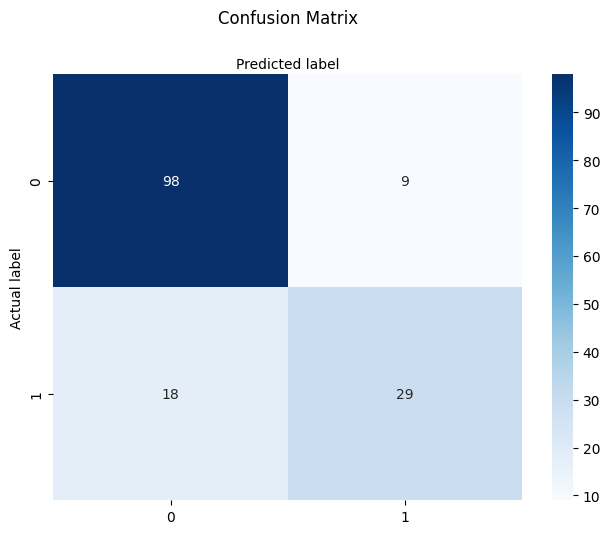

In [ ]:
#Visualize confusion matrix
import seaborn as sns
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Apply heatmap
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# One-at-a-Time Iterative Training<br>
Necessary for tracking loss and accuracy!

In [ ]:
#Import module for iterative training
from sklearn.linear_model import SGDClassifier

# Instantiate SGDClassifier for iterative training
classifier_iterative = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=0)

In [ ]:
#Initialize empty lists to store loss and accuracy
loss_history = []
accuracy_history = []

In [ ]:
#Train model partially on each iteration
from sklearn import metrics

num_iterations = 400
for iteration in range(num_iterations):
    classifier_iterative.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

    # Calculate and store loss
    Y_train_prob = classifier_iterative.predict_proba(X_train)
    loss = metrics.log_loss(Y_train, Y_train_prob)
    loss_history.append(loss)

    # Calculate and store accuracy
    Y_train_pred = classifier_iterative.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train, Y_train_pred)
    accuracy_history.append(accuracy)

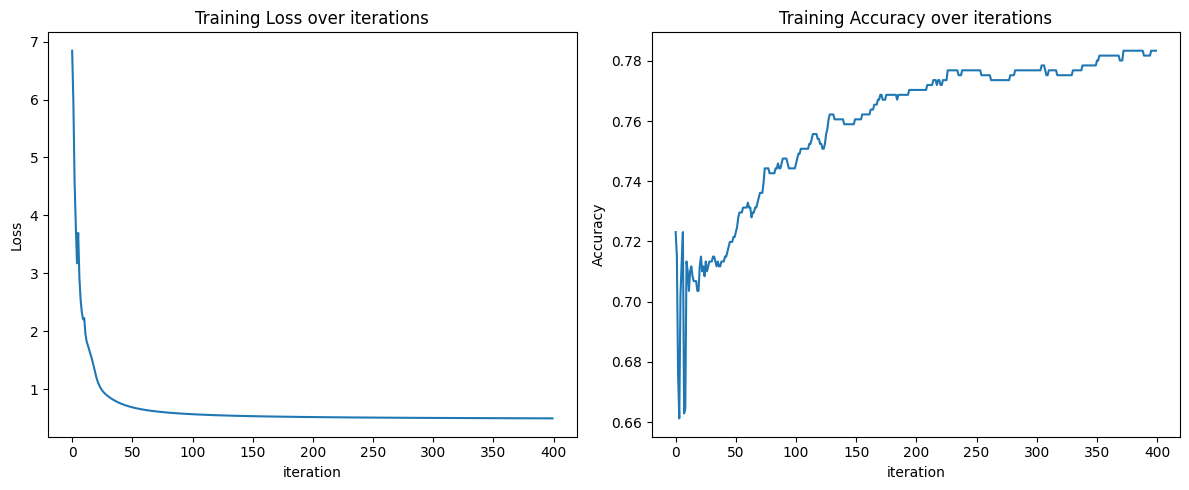

In [ ]:
#Plot the collected loss and accuracy values over iterations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss
ax1.plot(range(num_iterations), loss_history)
ax1.set_xlabel('iteration')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss over iterations')

# Plot accuracy
ax2.plot(range(num_iterations), accuracy_history)
ax2.set_xlabel('iteration')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy over iterations')

plt.tight_layout()
plt.show()

Text(0.5, 23.52222222222222, 'Predicted label')

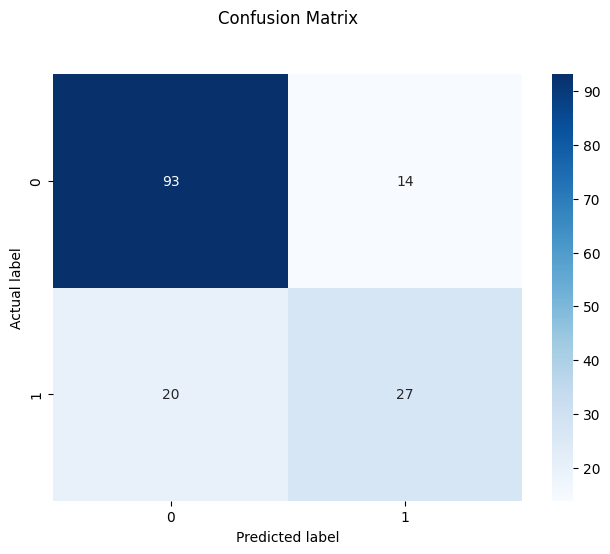

In [ ]:
# Obtain predictions on the test set using the iteratively trained model
Y_test_pred = classifier_iterative.predict(X_test)

# Plot confusion matrix again
cm2 = confusion_matrix(Y_test, Y_test_pred) #'cm' = confusion matrix

sns.heatmap(pd.DataFrame(cm2), annot = True, cmap = "Blues", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Results
model_acc = metrics.accuracy_score(Y_test, Y_test_pred)
model_pre = metrics.precision_score(Y_test, Y_test_pred)
model_rec = metrics.recall_score(Y_test, Y_test_pred)
model_F1 = metrics.f1_score(Y_test, Y_test_pred)

print(f"Accuracy:  {model_acc:.3f}")
print(f"Precision:  {model_pre:.3f}")
print(f"Recall:  {model_rec:.3f}")
print(f"F1 Score:  {model_F1:.3f}")

Accuracy:  0.779
Precision:  0.659
Recall:  0.574
F1 Score:  0.614
